In [1]:
import numpy as np
import matplotlib.pyplot as plt
import traceback

In [2]:
meta = np.load('IJBC_backup.npz')

In [3]:
list(meta.keys())

['templates',
 'medias',
 'p1',
 'p2',
 'label',
 'img_names',
 'landmarks',
 'face_scores']

In [4]:
l = meta['label']
l.shape

(15658489,)

In [5]:
l[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
import IJB_evals as IJB

In [7]:
from IPython.display import display

In [74]:
embs_list = [ \
        ('/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/MS1MV2-ResNet100-Arcface_IJBC.npz', 'MS1MV2', 'ResNet100', 'ArcFace', 'M2-R100-A', 0.991,	0.984,	0.975,	0.963,	0.945,	0.898),
        ('/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/VGG2-ResNet50-Arcface_IJBC.npz', 'VGGFace2', 'ResNet50', 'ArcFace', 'V-R50-A', 0.994,	0.984,	0.963,	0.928,	0.875,	0.744),
        ('/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_0.1_IJBC.npz', 'Glint360k', 'ResNet100', 'PartialFC_r0.1', 'G-R100-P1.0', 0.993,	0.988,	0.981,	0.973,	0.960,	0.912),
        ('/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/IJB_result/glint360k_r100FC_1.0_IJBC.npz', 'Glint360k', 'ResNet100', 'PartialFC_r1.0', 'G-R100-P0.1', 0.992,	0.987,	0.981,	0.974,	0.961,	0.872),
        ('/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_res50.npy', 'MS1M', 'ResNet50', 'ArcFace', 'M1-R50-A', 0.979,	0.954,	0.918,	0.861,	0.782,	0.701),
        ('/s/red/b/nobackup/data/portable/tbiom/models/arcface-tf2/ijbc_embs_arc_mbv2.npy', 'MS1M', 'MobileNetV2', 'ArcFace', 'M1-MB2-A', 0.981,	0.940,	0.869,	0.766,	0.629,	0.503),
        ('/s/red/b/nobackup/data/portable/tbiom/models/facenet/vggface2_ir2_ijbc_embs.npy', 'VGGFace2', 'InceptionResNetV1', 'CenterLoss', 'V-IR1-C', 0.990,	0.967,	0.908,	0.808,	0.681,	0.518),
        ('/s/red/b/nobackup/data/portable/tbiom/models/facenet/casia_ir2_ijbc_embs.npy', 'CASIA-WebFace', 'InceptionResNetV1', 'CenterLoss', 'C-IR1-C', 0.981,	0.929,	0.832,	0.697,	0.534,	0.408),
        #('/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am.npy', 'MS1M', '64-CNN', 'SphereFace+PFE', 'M1-64S-PFE', 0.985,	0.970,	0.942,	0.872,	0.757,	0.610),
        #('/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am.npy', 'CASIA-WebFace', '64-CNN', 'SphereFace+PFE', 'C-64S-PFE', 0.982,	0.949,	0.889,	0.798,	0.678,	0.530),
        ('/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_msarcface_am_nosigma.npy', 'MS1M', '64-CNN', 'SphereFace+PFE', 'M1-64S-PFE_NS', 0.985,	0.970,	0.942,	0.872,	0.757,	0.610),
        ('/s/red/b/nobackup/data/portable/tbiom/models/Probabilistic-Face-Embeddings/ijbc_embs_pfe_sphere64_casia_am_nosigma.npy', 'CASIA-WebFace', '64-CNN', 'SphereFace+PFE', 'C-64S-PFE_NS', 0.982,	0.949,	0.889,	0.798,	0.678,	0.530),
    ]

M2-R100-A 22.021454 31.161654
V-R50-A 22.79648 30.130688
G-R100-P1.0 24.498167 33.408054
G-R100-P0.1 24.064241 32.047794
M1-R50-A 1.0 1.5186068
M1-MB2-A 1.0 1.2958407
V-IR1-C 1.983130445717918 3.0505384691880133
C-IR1-C 1.9829446473381094 2.477952805721741
M1-64S-PFE_NS 1.0 1.3444979
C-64S-PFE_NS 1.0 1.3802052


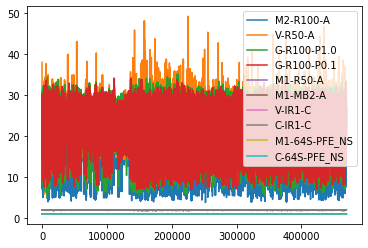

In [83]:
for path, _, _, _, label, _, _, _, _, _, _ in embs_list:
    X = np.load(path)
    if '.npz' in path:
        X = X['embs']
    norm = np.linalg.norm(X, ord=2, axis=1)
    plt.plot(norm, label=label)
    print(label, np.mean(norm), np.linalg.norm(np.mean(X, axis=1)))
    
plt.legend()
plt.show()

In [77]:
singular_values_list = []
for path, _, _, _, label, _, _, _, _, _, _ in embs_list:
    X = np.load(path)
    if '.npz' in path:
        X = X['embs']
    s = np.linalg.svd(X, compute_uv=False)
    #print(d, a, h, i)
    singular_values_list.append(s)

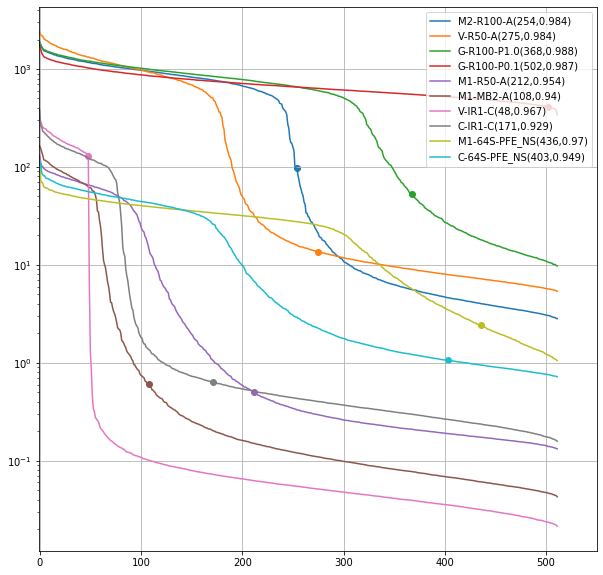

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
for s_i in range(len(singular_values_list)):
    s = singular_values_list[s_i]
    path, dset, arch, head, label, e1, e2, e3, e4, e5, e6 = embs_list[s_i]
    variance_sum = np.sum(s)
    variance_thresholded = variance_sum * 0.99
    i = s.shape[0] - 1
    while i > 0:
        variance_sum -= s[i]
        if variance_sum <= variance_thresholded:
            break
        i -= 1
    
    ax.plot(s, label='{}({},{})'.format(label, i, e2))
    plt.scatter(i, s[i-1], marker='o')

#sorts = np.argsort([i for s, i in results])[::-1]
ax.set_yscale('log')
ax.set_xlim([-1, 550])
plt.legend()
plt.grid()
plt.savefig('/s/red/b/nobackup/data/portable/tbiom/results/plotted/SingularValues.pdf', bbox_inches='tight')
plt.show()

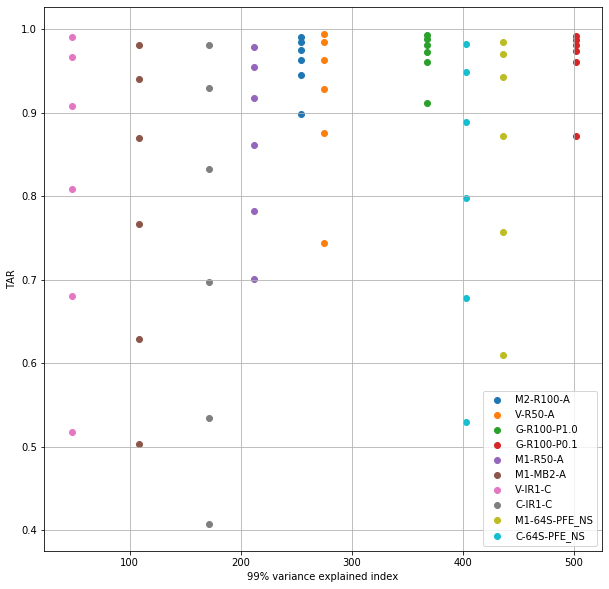

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
for s_i in range(len(singular_values_list)):
    s = singular_values_list[s_i]
    path, dset, arch, head, label, e1, e2, e3, e4, e5, e6 = embs_list[s_i]
    variance_sum = np.sum(s)
    variance_thresholded = variance_sum * 0.99
    i = s.shape[0] - 1
    while i > 0:
        variance_sum -= s[i]
        if variance_sum <= variance_thresholded:
            break
        i -= 1
        
    plt.scatter([i]*6, [e1, e2, e3, e4, e5, e6], label=label)
plt.legend()
ax.set_xlabel('99% variance explained index')
ax.set_ylabel('TAR')
plt.grid()
plt.savefig('/s/red/b/nobackup/data/portable/tbiom/results/plotted/IntrinsicDimensionality_vs_TAR.pdf', bbox_inches='tight')

 dimensionality vs avg mapping penalty (source vs target)

# ~~cache maps~~

In [7]:
import map_tools

In [8]:
import importlib
importlib.reload(IJB)
importlib.reload(map_tools)

<module 'map_tools' from '/s/red/b/nobackup/data/portable/tbiom/models/insightface/evaluation/IJB/map_tools.py'>

# eval maps

In [9]:
dataframes = {}
fit_flips = False
decay_coef = 0.001
pre_template_map= True
is_rotation_map = True

In [15]:
class Args:
    def __init__(self, subset='IJBC', is_bunch=False, restore_embs_left=None, restore_embs_right=None, fit_mapping=False, fit_flips=False, decay_coef=0.0, pre_template_map=False, is_rotation_map=True, is_procrustes=False, is_wahba=False, use_face_scores=False, explained_variance_proportion=1.0, save_result="IJB_result/{model_name}_{subset}.npz"):
        self.subset = subset
        self.is_bunch=is_bunch
        self.restore_embs_left = restore_embs_left
        self.restore_embs_right = restore_embs_right
        self.fit_mapping = fit_mapping
        self.fit_flips = fit_flips
        self.decay_coef = decay_coef
        self.pre_template_map = pre_template_map
        self.is_rotation_map = is_rotation_map
        self.is_procrustes = is_procrustes
        self.is_wahba = is_wahba
        self.explained_variance_proportion = explained_variance_proportion
        self.save_result = save_result
        self.save_embeddings = False
        self.model_file = None
        self.data_path = './'
        self.batch_size=64
        self.save_label=False
        self.force_reload=False
        self.is_one_2_N=False
        self.use_face_scores=use_face_scores
        self.plot_only=None
        self.n_individuals=-1
        self.explained_variance_proportion=1.0
        self.print_log=False
    def __str__(self):
        return str(self.__class__) + ": " + str(self.__dict__)

In [ ]:
for left_embs, left_dataset, left_architecture, left_head in embs_list:
    for right_embs, right_dataset, right_architecture, right_head in embs_list:
        if left_embs == right_embs:
            fit_mapping=False
        else:
            fit_mapping=True

        try:
            #for pre_template_map in pre_template_map:
            save_result_name = '{}_TO_{}_procrustes'.format(left_embs.split('/')[-1].split('.')[0], right_embs.split('/')[-1].split('.')[0])
            save_result = '../../../../results/{}.npz'.format(save_result_name)
            args = Args(subset='IJBC',  
                is_bunch=False,
                restore_embs_left=left_embs,
                restore_embs_right=right_embs,
                fit_mapping=fit_mapping,
                fit_flips=fit_flips,
                decay_coef=decay_coef,
                pre_template_map=pre_template_map,
                is_rotation_map=is_rotation_map,
                is_procrustes=True,
                save_result=save_result)
            df, fig = IJB.main(args)
            df['L_DATASET'] = left_dataset
            df['L_ARCH'] = left_architecture
            df['L_HEAD'] = left_head
            df['R_DATASET'] = right_dataset
            df['R_ARCH'] = right_architecture
            df['R_HEAD'] = right_head
            display(df)
            dataframes[save_result_name] = df
            print('saving to', args.save_result + '.csv')
            df.to_csv(args.save_result + '.csv')
        except Exception:
            traceback.print_exc()